In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,precision_recall_curve, auc
from sklearn.naive_bayes import GaussianNB
sns.set_style('white')
plt.xkcd()

In [6]:
raw = pd.read_csv("../data/creditcard.csv")

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, 
due to confidentiality issues, 
we cannot provide the original features and more background information about the data. 
Features V1, V2, … V28 are the principal components obtained with PCA

In [7]:
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class', ylabel='count'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

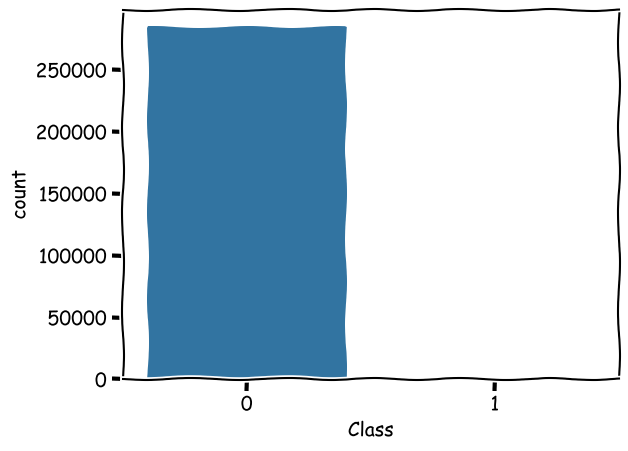

In [9]:

sns.countplot(x='Class',data=raw)

In [10]:
one = (raw['Class'] == 1).sum()
zero = (raw['Class'] == 0).sum()
ratio = one / zero
ratio

np.float64(0.0017304750013189597)

The ratio is about 0.00173. This dataset is extremely imbalance, so i will avoid using accuracy.

In [11]:
data = raw.drop(columns=['Amount','Time'])

In [12]:
X = data.drop(columns=['Class'])
y = data['Class']

In [13]:

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   feature  VIF
0       V1  1.0
1       V2  1.0
2       V3  1.0
3       V4  1.0
4       V5  1.0
5       V6  1.0
6       V7  1.0
7       V8  1.0
8       V9  1.0
9      V10  1.0
10     V11  1.0
11     V12  1.0
12     V13  1.0
13     V14  1.0
14     V15  1.0
15     V16  1.0
16     V17  1.0
17     V18  1.0
18     V19  1.0
19     V20  1.0
20     V21  1.0
21     V22  1.0
22     V23  1.0
23     V24  1.0
24     V25  1.0
25     V26  1.0
26     V27  1.0
27     V28  1.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [15]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced"),
    "SVM": LinearSVC(random_state=42, max_iter=5000,class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(random_state=42,class_weight="balanced")
}

class_weight="balanced" helps Random Forest, Logistic Regression, and Linear SVM handle the imbalanced minority class.

In [16]:

from sklearn.inspection import permutation_importance

def calculate_feature_importance(classifiers, X_train, y_train):
    importance_results = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)

        if name == "Random Forest":
            importance_results[name] = clf.feature_importances_

        elif name == "Logistic Regression":
            importance_results[name] = np.abs(clf.coef_[0])

        elif name == "SVM":
            if hasattr(clf, "coef_"):  # only linear SVM
                importance_results[name] = np.abs(clf.coef_[0])

        elif name in ["KNN"]:
            result = permutation_importance(clf, X_train, y_train, n_repeats=5, random_state=42, n_jobs=-1)
            importance_results[name] = result.importances_mean

    return importance_results

In [17]:
# def plot_feature_importance(importance_values, feature_names):
#     plt.figure(figsize=(12, 8))

#     for i, (name, importance) in enumerate(importance_values.items()):
#         if importance is not None:
#             plt.subplot(2, 2, i+1)
#             plt.barh(feature_names, importance)
#             plt.title(f'Feature Importance - {name}')
#             plt.xlabel('Importance')
#             plt.ylabel('Feature')

#     plt.tight_layout()
#     plt.show()

In [18]:
# importance_values = calculate_feature_importance(classifiers, X_train, y_train)

In [19]:
# feature_names = data.drop(columns=['Class']).columns    
# plot_feature_importance(importance_values, feature_names)

In [20]:
def evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    reports = {}
    
    for name, clf in classifiers.items():
        print(f"Training {name}...")
        
        # Train classifier
        clf.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = clf.predict(X_test)
        
        # Generate classification report
        report = classification_report(y_test, y_pred, digits=4)
        reports[name] = report
    
    return reports

In [21]:
reports = evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test)


for name, report in reports.items():
    print(f"--- {name} ---\n{report}\n")

Training Random Forest...
Training SVM...
Training KNN...
Training Logistic Regression...
--- Random Forest ---
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962


--- SVM ---
              precision    recall  f1-score   support

           0     0.9998    0.9793    0.9895     56864
           1     0.0702    0.9082    0.1304        98

    accuracy                         0.9792     56962
   macro avg     0.5350    0.9437    0.5599     56962
weighted avg     0.9982    0.9792    0.9880     56962


--- KNN ---
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9091    0.8163    0.8602        98

    accuracy                         0.9995 

In [22]:
def plot_roc_curves(classifiers, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # --- ROC Curve ---
    plt.subplot(1, 2, 1)
    for name, clf in classifiers.items():
        if hasattr(clf, "predict_proba"):
            y_score = clf.predict_proba(X_test)[:, 1]
        else:
            # SVM with decision_function instead of predict_proba
            y_score = clf.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

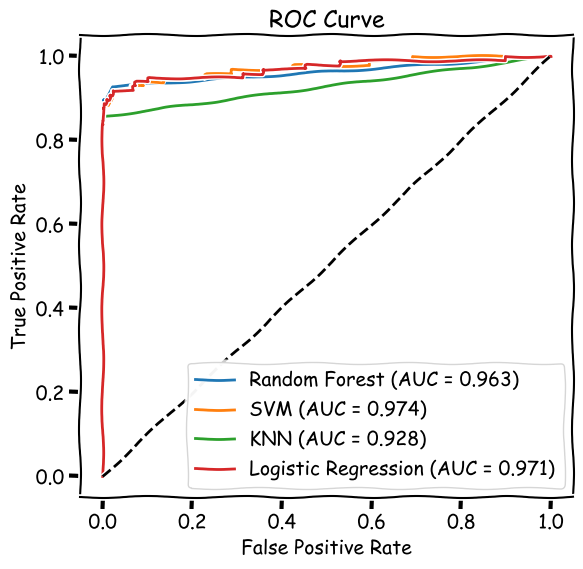

In [23]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

plot_roc_curves(classifiers, X_test, y_test)

In [24]:
def plot_confusion_matrices(classifiers, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for ax, (name, clf) in zip(axes.flatten(), classifiers.items()):
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, normalize="true")

        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", 
                    xticklabels=["Non-Fraud", "Fraud"], 
                    yticklabels=["Non-Fraud", "Fraud"], ax=ax)
        ax.set_title(f"{name} - Confusion Matrix")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    plt.tight_layout()
    plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

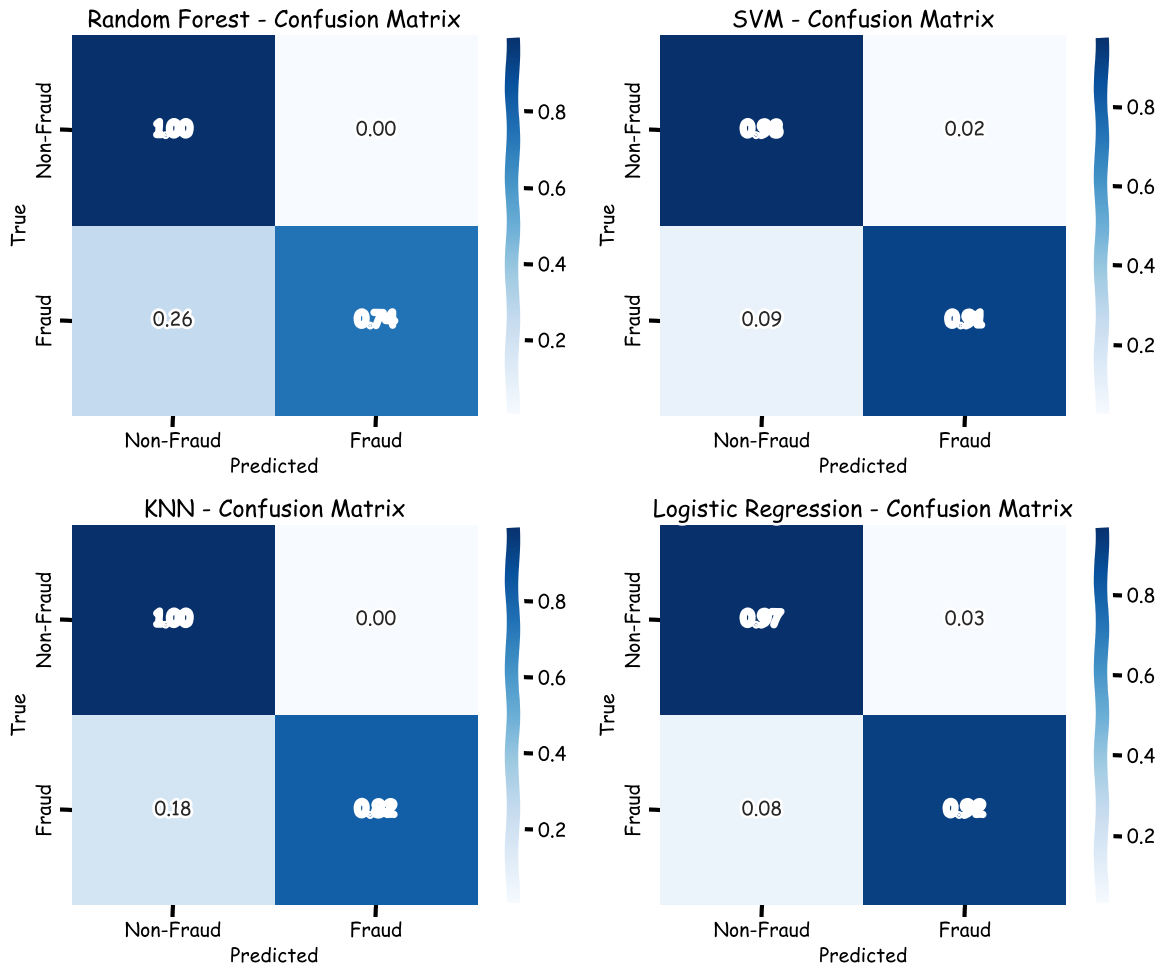

In [25]:
plot_confusion_matrices(classifiers, X_test, y_test)

In [ ]:

results = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    y_pred = clf.predict(X_test)
    y_scores = (clf.decision_function(X_test) if hasattr(clf, "decision_function") else clf.predict_proba(X_test)[:,1])
    
    # Precision, Recall, F1
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    
    results[name] = {
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1": report["1"]["f1-score"],
        "PR AUC": pr_auc
    }


results_df = pd.DataFrame(results).T
print(results_df)


Training Random Forest...
Training SVM...
Training KNN...
Training Logistic Regression...
                     Precision    Recall        F1    PR AUC
Random Forest         0.960526  0.744898  0.839080  0.859771
SVM                   0.070245  0.908163  0.130403  0.724624
KNN                   0.909091  0.816327  0.860215  0.871533
Logistic Regression   0.057878  0.918367  0.108893  0.740037
